In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,precision_score,f1_score,recall_score,confusion_matrix,roc_auc_score
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [2]:
download_path=os.path.join(os.path.expanduser("~"),"Downloads")
file_path=os.path.join(download_path,"loan_approval_dataset.csv")

In [3]:
df=pd.read_csv(file_path)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


**EDA**

In [4]:
df.shape

(4269, 13)

In [5]:
df.isnull().sum().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [7]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [8]:
df.describe(include='object')

,education,self_employed,loan_status
count,4269,4269,4269
unique,2,2,2
top,Graduate,Yes,Approved
freq,2144,2150,2656


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.columns = df.columns.str.strip()
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [11]:
num_col=df.select_dtypes(include='number').columns.str.strip()
num_col

Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'],
      dtype='object')

In [12]:
cat_col=df.select_dtypes(include='object').columns.str.strip()
cat_col

Index(['education', 'self_employed', 'loan_status'], dtype='object')

In [13]:
print("Outliers in each numerical column:\n")
for col in num_col:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    iqr=Q3-Q1
    lower=Q1-1.5*iqr
    upper=Q3+1.5*iqr
    outlier=df[(df[col]<lower)| (df[col]>upper)]

    print(f"{col} :  ", outlier.shape[0])
    

Outliers in each numerical column:

loan_id :   0
no_of_dependents :   0
income_annum :   0
loan_amount :   0
loan_term :   0
cibil_score :   0
residential_assets_value :   52
commercial_assets_value :   37
luxury_assets_value :   0
bank_asset_value :   5


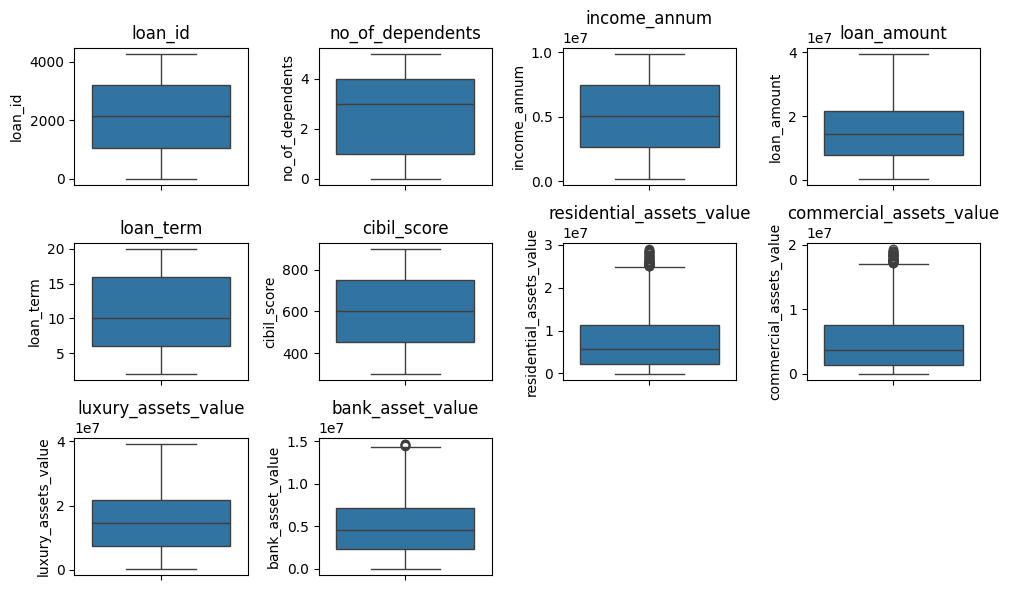

In [14]:
plt.figure(figsize=(10,6))

for i,col in enumerate(num_col,1):
    plt.subplot(3,4,i)
    sns.boxplot(df[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

In [15]:
# CAPPING
df_clip=df.copy()
for col in num_col:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    iqr=Q3-Q1
    lower=Q1-1.5*iqr
    upper=Q3+1.5*iqr

    df_clip[col]=df_clip[col].clip(lower=lower,upper=upper)

In [16]:
print("Outliers in each numerical column after capping:\n")
for col in num_col:
    Q1=df_clip[col].quantile(0.25)
    Q3=df_clip[col].quantile(0.75)
    iqr=Q3-Q1
    lower=Q1-1.5*iqr
    upper=Q3+1.5*iqr
    outlier_after=df_clip[(df_clip[col]<lower)| (df_clip[col]>upper)]

    print(f"{col} :  ", outlier_after.shape[0])

Outliers in each numerical column after capping:

loan_id :   0
no_of_dependents :   0
income_annum :   0
loan_amount :   0
loan_term :   0
cibil_score :   0
residential_assets_value :   0
commercial_assets_value :   0
luxury_assets_value :   0
bank_asset_value :   0


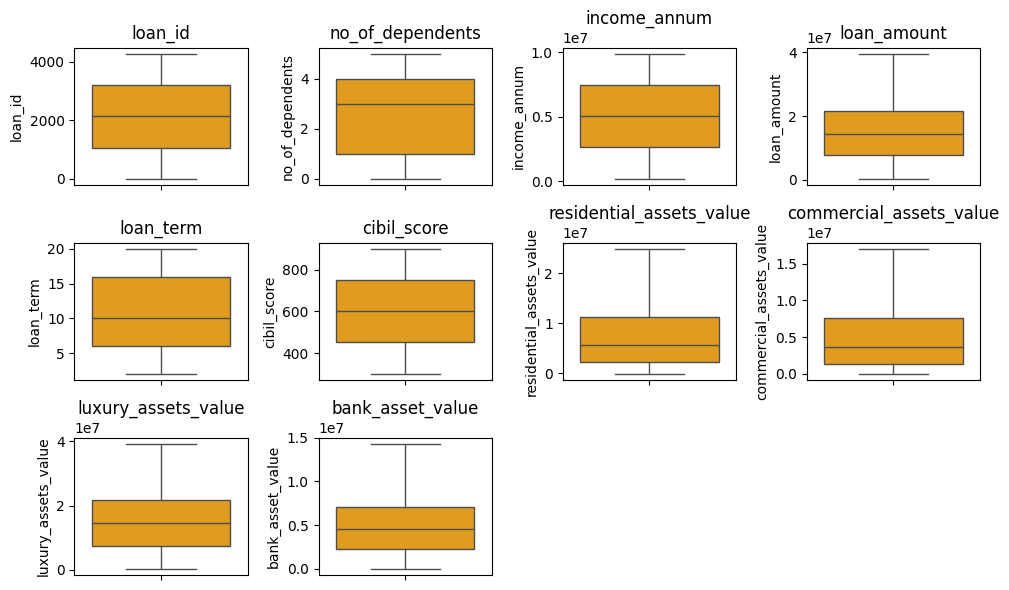

In [17]:
plt.figure(figsize=(10,6))

for i,col in enumerate(num_col,1):
    plt.subplot(3,4,i)
    sns.boxplot(df_clip[col],color='orange')
    plt.title(col)
    plt.tight_layout()
plt.show()

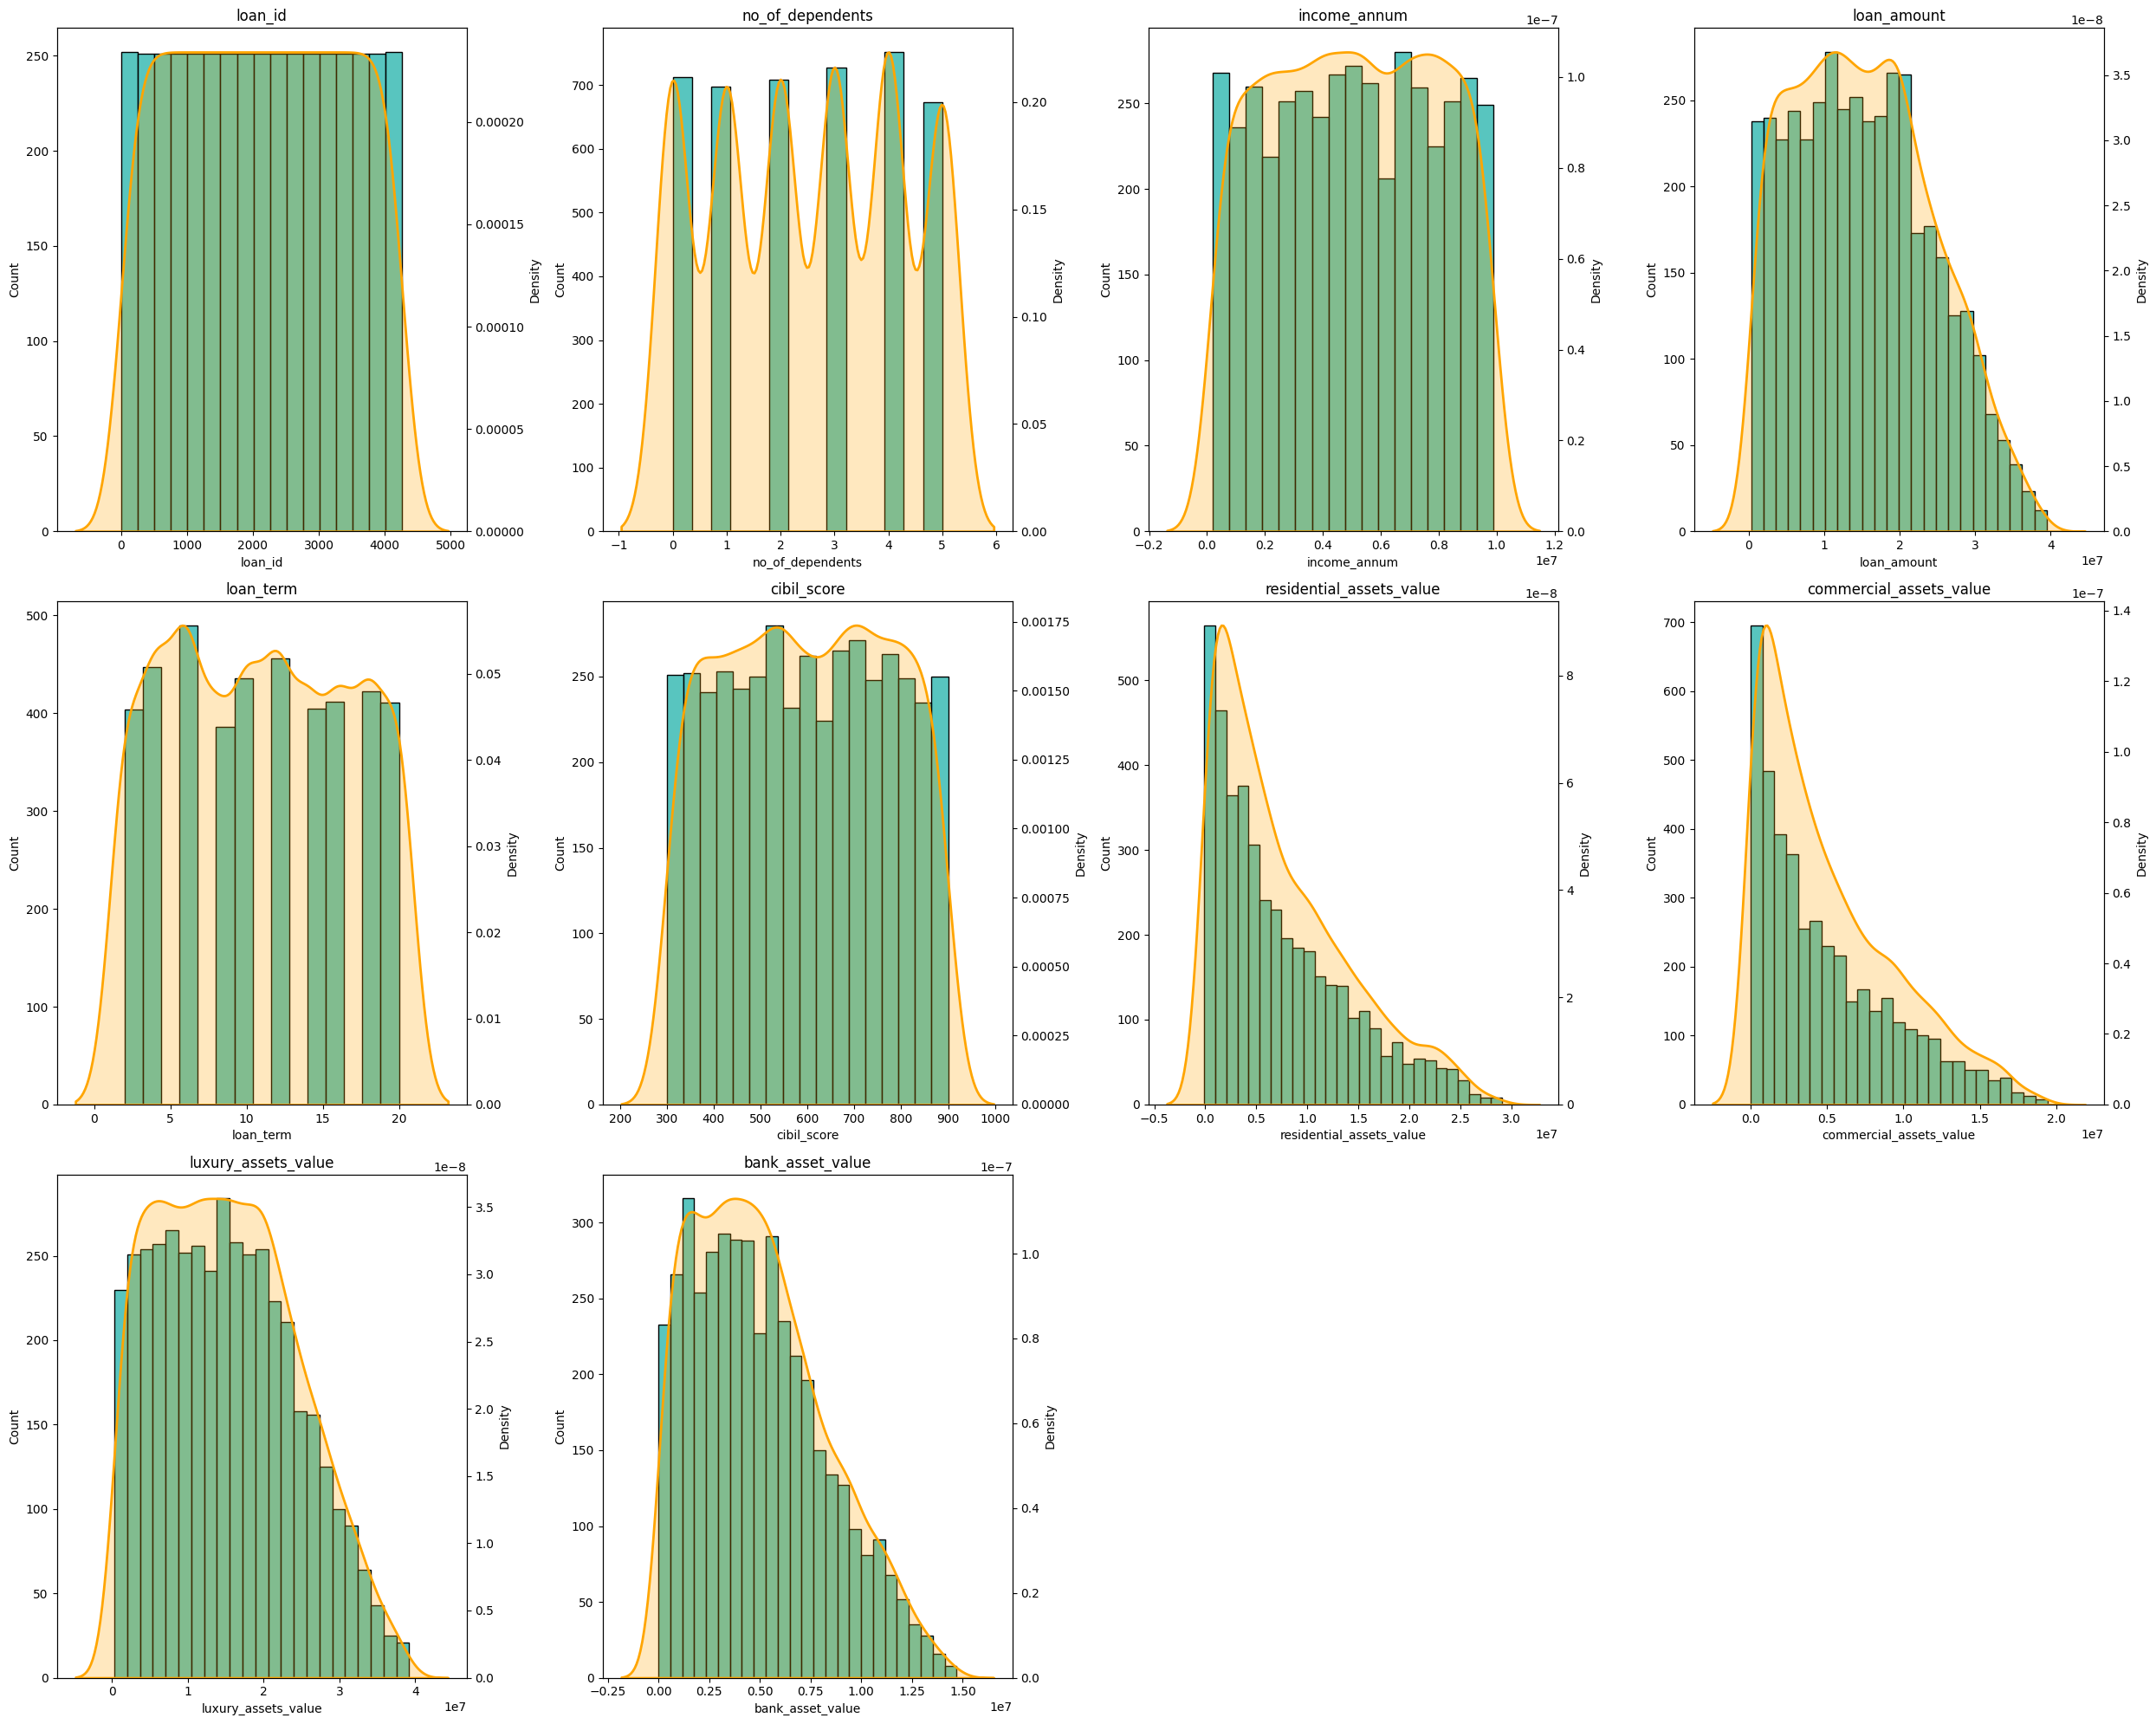

In [18]:
plt.figure(figsize=(25,20))
for i,num in enumerate(num_col,1):
    plt.subplot(3,4,i)
    sns.histplot(df[num],color='lightseagreen')
     # KDE on secondary y-axis
    ax2 = plt.twinx()
    sns.kdeplot(df[num], color='orange', linewidth=2, ax=ax2,fill=True)    
    plt.title(num)
plt.tight_layout()
plt.show()

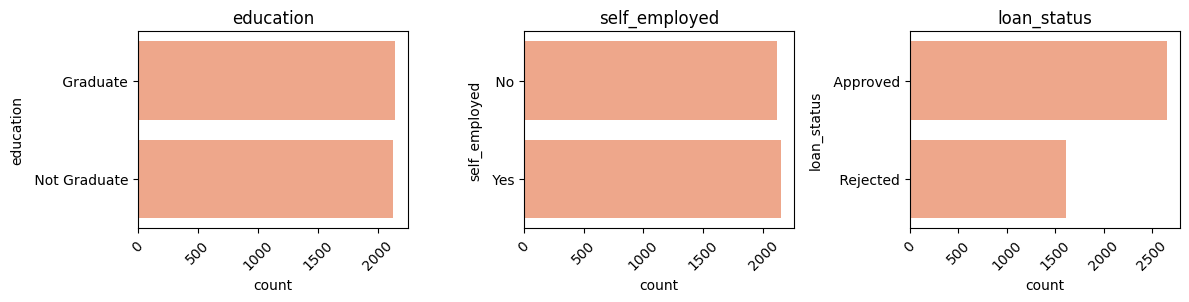

In [19]:
plt.figure(figsize=(12,8))
for i,cat in enumerate(cat_col,1):
    plt.subplot(3,3,i)
    sns.countplot(df[cat],color='lightsalmon')
    plt.title(cat)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

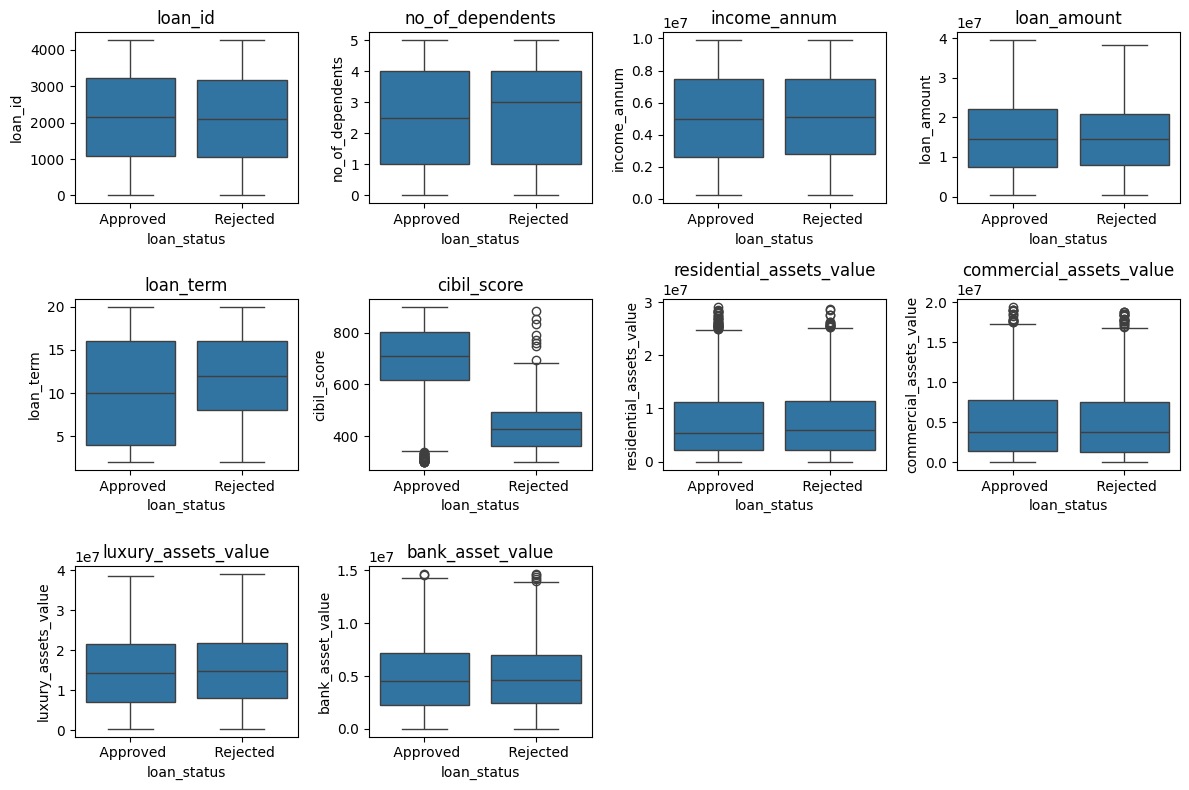

In [20]:
plt.figure(figsize=(12,8))
for i,col in enumerate(num_col,1):
    plt.subplot(3,4,i)
    sns.boxplot(x=df['loan_status'],y=df[col])
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

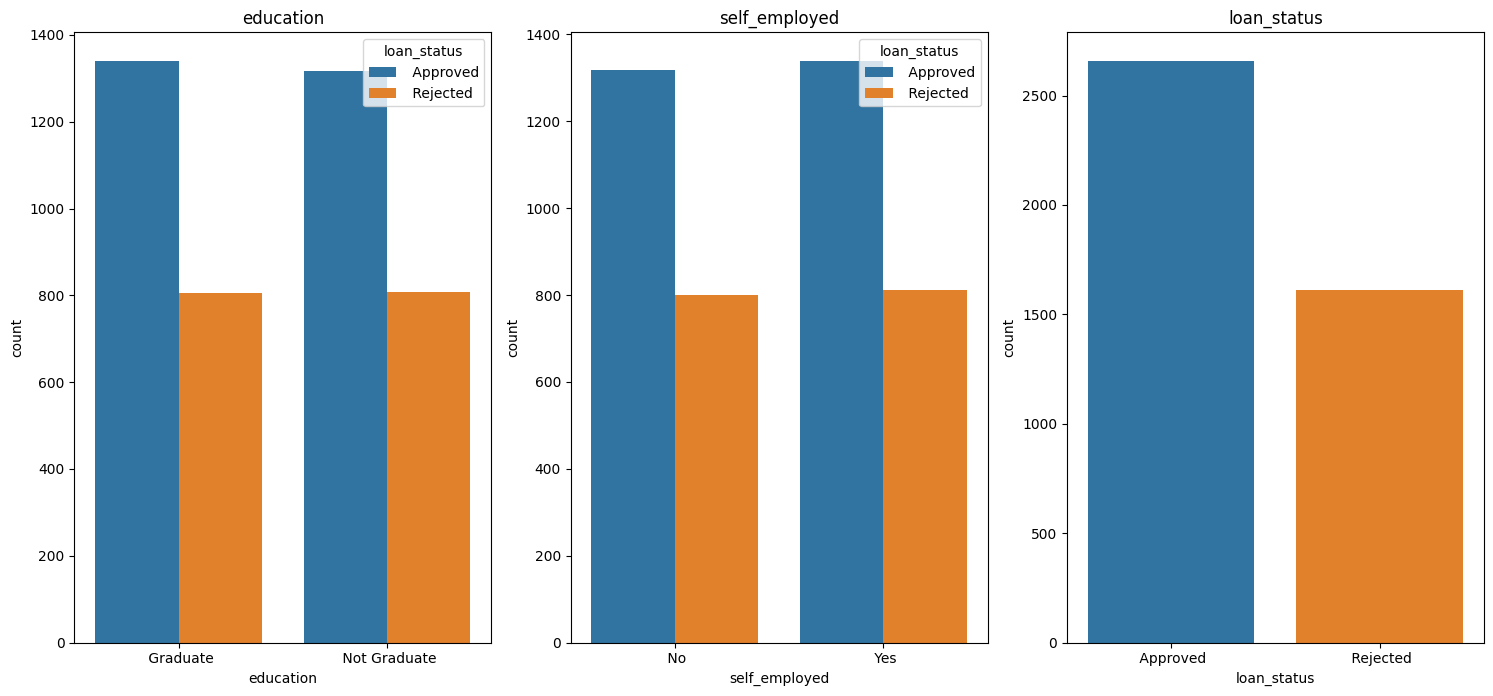

In [21]:
plt.figure(figsize=(20,20))
for i,cat in enumerate(cat_col,1):
    plt.subplot(3,4,i)
    sns.countplot(x=df[cat], hue=df['loan_status'])
    plt.title(f"{cat}")
plt.tight_layout()
plt.show()

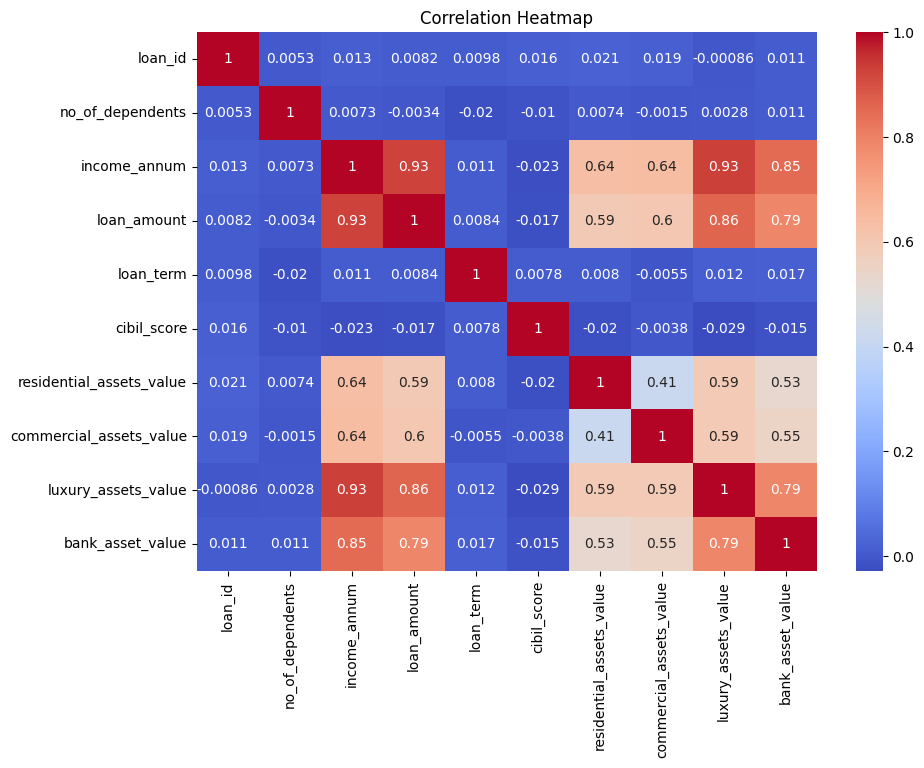

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(df[num_col].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**MODEL TRAINING**

In [24]:
le=LabelEncoder()

category=['education','self_employed']
for cols in cat_col:
    df[cols]=le.fit_transform(df[cols])

# Graduate-0
# Not Graduate-1

# No-0
# Yes-1

# Approved=0
# Rejected=1

In [25]:
df.head()
X=df.drop(['loan_status','loan_id'],axis=1)
y=df['loan_status']
# X.head()

In [26]:
X.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000


In [27]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
print("X train shape:",X_train.shape)
print("X test shape:",X_test.shape)
print("Y train shape:",y_train.shape)
print("Y test shape:",y_test.shape)

X train shape: (3415, 11)
X test shape: (854, 11)
Y train shape: (3415,)
Y test shape: (854,)


In [30]:
print(num_col.tolist())

['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


In [31]:
num_col = ['no_of_dependents','education','self_employed','income_annum','loan_amount','loan_term',
           'cibil_score','residential_assets_value','commercial_assets_value',
           'luxury_assets_value','bank_asset_value']

In [32]:
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train[num_col])
X_test_scaled=scaler.transform(X_test[num_col])

In [33]:
X_train_sc=pd.DataFrame(X_train_scaled,columns=num_col)
X_train_sc.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,1.512508,1.002639,-1.015047,1.009500,1.624772,-0.860003,-0.187401,-0.255384,2.046786,0.078083,1.160414
1,-1.435001,1.002639,0.985176,1.614171,2.077128,0.188894,0.637397,2.495693,1.223111,2.498432,0.882020
2,-0.845499,-0.997368,-1.015047,-1.515891,-1.354157,-0.510371,0.474761,-0.805600,-0.881836,-1.339239,-1.314198
3,-0.255997,-0.997368,0.985176,-0.057566,-0.228784,1.237791,0.892968,0.111426,-0.378479,0.143498,0.696424
4,1.512508,-0.997368,0.985176,-0.733375,-0.449445,0.188894,-0.925072,0.157277,-0.561518,-0.859530,-0.912074


In [34]:
lr=LogisticRegression(max_iter=500)
lr.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [35]:
y_pred=lr.predict(X_test_scaled)

In [47]:
rf=RandomForestClassifier(
    max_depth=3,
    n_estimators=100,
    min_samples_split=5,
    min_samples_leaf=2,
    criterion='entropy',
    random_state=42
)
rf.fit(X_train_scaled,y_train)

,n_estimators,100
,criterion,'entropy'
,max_depth,3
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [36]:
test_df=pd.DataFrame(X_test_scaled, columns=num_col).head(10)
pred_df=lr.predict(test_df)
pred_df

C:\Users\BIT\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1])

In [51]:
# test_df=pd.DataFrame(X_test_scaled, columns=num_col).head(10)
pred_rfdf=rf.predict(test_df)
pred_rfdf

C:\Users\BIT\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1])

In [52]:
y_rfpred=rf.predict(X_test_scaled)

In [37]:
y_test.head(10)

1703    1
1173    0
308     1
1322    0
3271    0
3539    0
1522    0
3399    1
1402    0
1829    1
Name: loan_status, dtype: int64

In [38]:
print("Actual vs Predicted loan Approval.")
result=pd.DataFrame(
    {
        'Actual':y_test.head(10),
        'Predicted':pred_df
    }
)
result

Actual vs Predicted loan Approval.


,Actual,Predicted
1703,1,1
1173,0,0
308,1,1
1322,0,0
3271,0,0
3539,0,0
1522,0,0
3399,1,1
1402,0,0
1829,1,1


In [39]:
print("Accuracy of Logistic Regression Model: ",accuracy_score(y_pred,y_test))
print("Precision of Logistic Regression Model: ",precision_score(y_pred,y_test))
print("F1 Score of Logistic Regression Model: ",f1_score(y_pred,y_test))
print("ROC–AUC Score of Logistic Regression Model: ",roc_auc_score(y_pred,y_test))
print("Confusion Matrix of Logistic Regression Model: \n",confusion_matrix(y_pred,y_test))

Accuracy of Logistic Regression Model:  0.905152224824356
Precision of Logistic Regression Model:  0.8647798742138365
F1 Score of Logistic Regression Model:  0.8716323296354992
ROC–AUC Score of Logistic Regression Model:  0.8995559046376075
Confusion Matrix of Logistic Regression Model: 
 [[498  43]
 [ 38 275]]


In [53]:
print("Accuracy of Random Forest Model: ",accuracy_score(y_rfpred,y_test))
print("Precision of Random Forest Model: ",precision_score(y_rfpred,y_test))
print("F1 Score of Random Forest Model: ",f1_score(y_rfpred,y_test))
print("ROC–AUC Score of Random Forest Model: ",roc_auc_score(y_rfpred,y_test))
print("Confusion Matrix of Random Forest Model: \n",confusion_matrix(y_rfpred,y_test))

Accuracy of Random Forest Model:  0.9707259953161592
Precision of Random Forest Model:  0.9622641509433962
F1 Score of Random Forest Model:  0.9607535321821036
ROC–AUC Score of Random Forest Model:  0.9684088711803825
Confusion Matrix of Random Forest Model: 
 [[523  12]
 [ 13 306]]


In [40]:
def get01(prompt):
    value = input(prompt)
    while value not in ["0", "1"]:
        print("Please enter only 0 or 1.")
        value = input(prompt)
    return int(value)

In [41]:
print("Enter the following information to correctly predict your loan status.")
dependent= int(input("Enter the number of dependents: "))
education= get01("Enter your graduation (0=Graduate, 1=Not-Graduate): ")
self_employed= get01("Enter if you are self employed (0 = No, 1 = Yes): ")
annual_income= float(input("Enter your annual income: "))
loan= float(input("Enter your loan amount: "))
loan_term= int(input("Enter for how many years you want the loan for: "))
cibil= int(input("Enter your cibil score: "))
residential_asset= float(input("Enter the value of your residential asset: "))
commercial_asset= float(input("Enter the value of your commercial asset: "))
luxury_asset= float(input("Enter the value of your luxury asset: "))
bank_asset= float(input("Enter the value of your bank asset: "))

Enter the following information to correctly predict your loan status.


Enter the number of dependents:  3
Enter your graduation (0=Graduate, 1=Not-Graduate):  0
Enter if you are self employed (0 = No, 1 = Yes):  0
Enter your annual income:  900000
Enter your loan amount:  1500000
Enter for how many years you want the loan for:  2
Enter your cibil score:  550
Enter the value of your residential asset:  250000
Enter the value of your commercial asset:  400000
Enter the value of your luxury asset:  300000
Enter the value of your bank asset:  200000


In [45]:
new_data=[
    dependent,
    education,
    self_employed,
    annual_income,
    loan,
    loan_term,
    cibil,
    residential_asset,
    commercial_asset,
    luxury_asset,
    bank_asset
]

In [55]:
new_df = pd.DataFrame([new_data], columns=num_col)

# APPLY TRAINED SCALER
new_data_scaled = scaler.transform(new_df)

#MODEL PREDICTION

prediction = lr.predict(new_data_scaled)[0]

# Get correct probabilities
prob_approve = lr.predict_proba(new_data_scaled)[0][0] * 100
prob_reject  = lr.predict_proba(new_data_scaled)[0][1] * 100

print("\n---- Loan Approval Result ----")

if prediction == 0:
    print("🎉 Congratulations! Your loan is likely to be APPROVED.")
    print(f"Approval probability: {prob_approve:.2f}%")
else:
    print("❌ Sorry! Your loan is likely to be REJECTED.")
    print(f"Rejection probability: {prob_reject:.2f}%")


---- Loan Approval Result ----
🎉 Congratulations! Your loan is likely to be APPROVED.
Approval probability: 82.85%


In [54]:
new_df = pd.DataFrame([new_data], columns=num_col)

# APPLY TRAINED SCALER
new_data_scaled = scaler.transform(new_df)

#MODEL PREDICTION

prediction = rf.predict(new_data_scaled)[0]

# Get correct probabilities
prob_approve = rf.predict_proba(new_data_scaled)[0][0] * 100
prob_reject  = rf.predict_proba(new_data_scaled)[0][1] * 100

print("\n---- Loan Approval Result ----")

if prediction == 0:
    print("🎉 Congratulations! Your loan is likely to be APPROVED.")
    print(f"Approval probability: {prob_approve:.2f}%")
else:
    print("❌ Sorry! Your loan is likely to be REJECTED.")
    print(f"Rejection probability: {prob_reject:.2f}%")


---- Loan Approval Result ----
🎉 Congratulations! Your loan is likely to be APPROVED.
Approval probability: 81.89%


In [ ]:
import pickle

pickle.dump(lr, open("loan_model.pkl", "wb"))